In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Final_cleaned_data.csv')

In [3]:
df.head()

,ISBN,Publisher,Book_Title,Book_Author,First_Publish_Year,Edition_Count,Book_Age,Edition_Count_Category,Total_Reviews,No_of_Pages,Book_Length_Category,Popularity_Score,Book_Price,Bestseller
0,1881320189,River City Pub,Goodbye to the Buttermilk Sky,Julia Oliver,1994,1,33,Low,189,363,Medium,113.8,32.15,1
1,0440295734,Bantam Books,The Testament,John Grisham,1999,62,26,High,588,474,Medium,377.6,37.70,1
2,0553502271,Random House Audio,The Testament,John Grisham,1999,61,26,High,8,116,Short,29.2,5.80,0
3,0439095026,Scholastic,Tell Me This Isn't Happening,Robynn Clairday,1999,1,26,Low,165,440,Medium,99.4,32.00,1
4,0060168013,Harpercollins,Pigs in Heaven,Barbara Kingsolver,1993,13,32,Medium,88,451,Medium,58.0,38.55,1


In [18]:
df.shape

(1009, 14)

In [4]:
df_colsrem = df.drop(columns=['ISBN','Publisher','Book_Title','Book_Author','First_Publish_Year','Edition_Count_Category','Book_Length_Category','Bestseller'])

In [5]:
df_colsrem.head()

,Edition_Count,Book_Age,Total_Reviews,No_of_Pages,Popularity_Score,Book_Price
0,1,33,189,363,113.8,32.15
1,62,26,588,474,377.6,37.70
2,61,26,8,116,29.2,5.80
3,1,26,165,440,99.4,32.00
4,13,32,88,451,58.0,38.55


In [7]:
numerical_features =['Edition_Count','Book_Age','Total_Reviews','No_of_Pages','Popularity_Score','Book_Price']
df_numerical = df[numerical_features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

In [8]:
pca_2 = PCA(n_components=2)
pca_result_2 = pca_2.fit_transform(df_scaled)
explained_variance_2 = sum(pca_2.explained_variance_ratio_) * 100

pca_3 = PCA(n_components=3)
pca_result_3 = pca_3.fit_transform(df_scaled)
explained_variance_3 = sum(pca_3.explained_variance_ratio_) * 100

In [16]:
pca_full = PCA()
pca_full.fit(df_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

In [10]:
eigenvalues = pca_full.explained_variance_[:3]

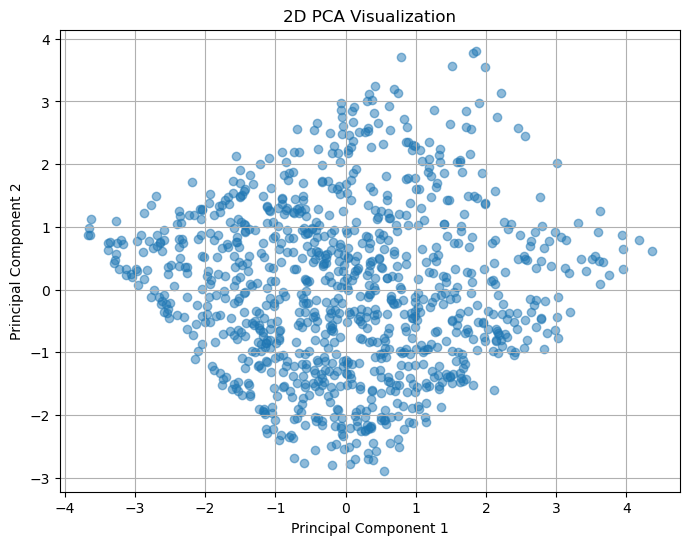

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result_2[:,0], pca_result_2[:,1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization')
plt.grid()
plt.show()

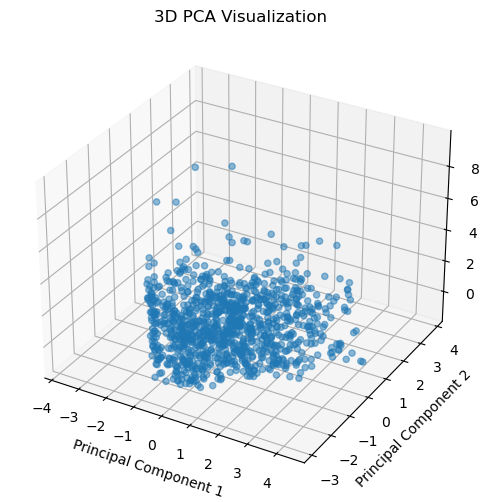

In [13]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result_3[:,0], pca_result_3[:,1], pca_result_3[:,2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Visualization')
plt.show()

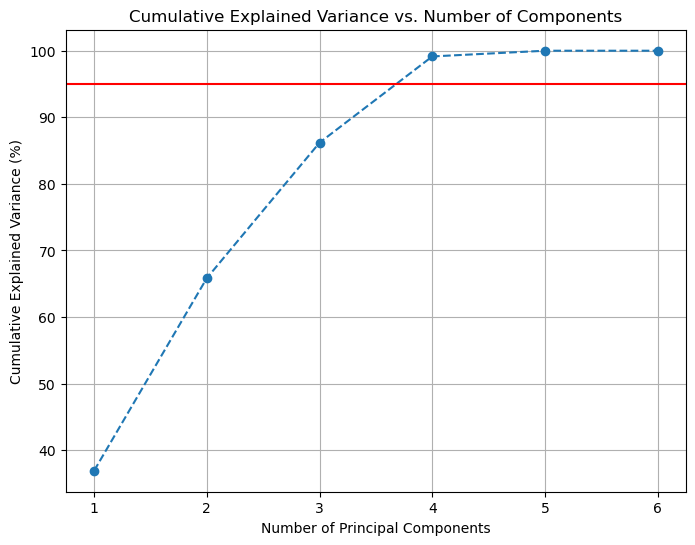

In [14]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, marker='o', linestyle='--')
plt.axhline(y=95, color='r', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [17]:
print(f"Percentage of information retained in 2D PCA: {explained_variance_2:.2f}%")
print(f"Percentage of information retained in 3D PCA: {explained_variance_3:.2f}%")
print(f"Number of components needed to retain at least 95% of the data: {num_components_95}")
print(f"Top three eigenvalues: {eigenvalues}")

Percentage of information retained in 2D PCA: 65.83%
Percentage of information retained in 3D PCA: 86.18%
Number of components needed to retain at least 95% of the data: 4
Top three eigenvalues: [2.21608222 1.73776647 1.22225588]
